In [1]:
# Import necessary Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load data from excel of US Power Plants Focus on Installed Capacity, Lat & Long
df = pd.read_excel('PowerPlantsintheU_Export_TableToExcel.xlsx')
X = df[['Install_MW','Total_MW','Latitude', 'Longitude']]
X

,Install_MW,Total_MW,Latitude,Longitude
0,2.3,2.3,45.178600,-89.685000
1,1.3,1.3,45.113600,-87.758600
2,91.0,79.0,44.540000,-88.008600
3,3.8,3.8,45.233300,-88.067800
4,2.6,2.6,45.441100,-89.730600
...,...,...,...,...
12003,3.0,3.0,35.380139,-82.375953
12004,3.0,3.0,36.009321,-79.367698
12005,5.0,5.0,35.273434,-79.736312
12006,1.4,1.4,42.876570,-73.910480


In [3]:
# Split the data into training & testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train, X_test

(       Install_MW  Total_MW   Latitude   Longitude
 11569         1.2       1.2  32.576159  -97.130048
 5426          6.4       6.4  43.820000  -75.917500
 11619         2.0       2.0  39.405457  -89.995709
 3896          7.5       7.8  42.961126 -123.359138
 8059          2.0       2.0  42.243250  -71.672328
 ...           ...       ...        ...         ...
 11964         2.0       2.0  42.307119  -89.598098
 5191          3.0       3.0  35.690833 -100.240278
 5390          9.0       9.0  35.022700 -114.162700
 860           3.8       4.6  42.730717 -122.515122
 7270          3.1       3.1  33.926666  -88.997563
 
 [9606 rows x 4 columns],
       Install_MW  Total_MW   Latitude   Longitude
 6323         1.0       1.0  34.708333 -118.130556
 6232        79.9      79.9  43.913056  -75.698611
 8099         6.9       6.9  40.631872  -97.642708
 2119        12.0       7.0  45.081111 -121.886611
 9906         5.0       5.0  35.195870  -77.502759
 ...          ...       ...        ...    

In [4]:
inertia = []
for k in range(1, 11):  # Adjust range as needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

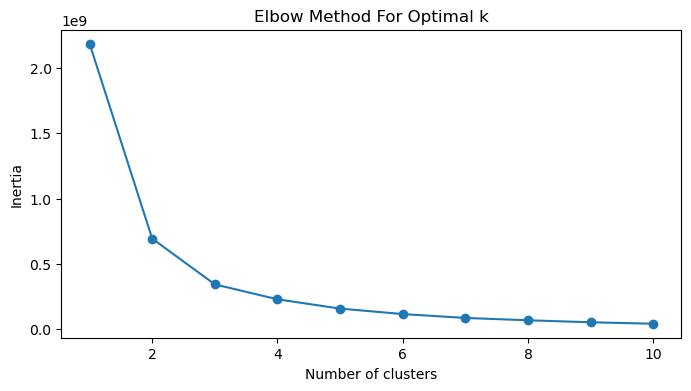

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
cluster_labels = kmeans.fit_predict(X)

C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
df.loc[X.index, 'cluster'] = cluster_labels

In [8]:
# Determine optimal_k visually from the elbow plot
optimal_k = 3 # (insert your determined value here)

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)
df.loc[X.index, 'cluster'] = cluster_labels

C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


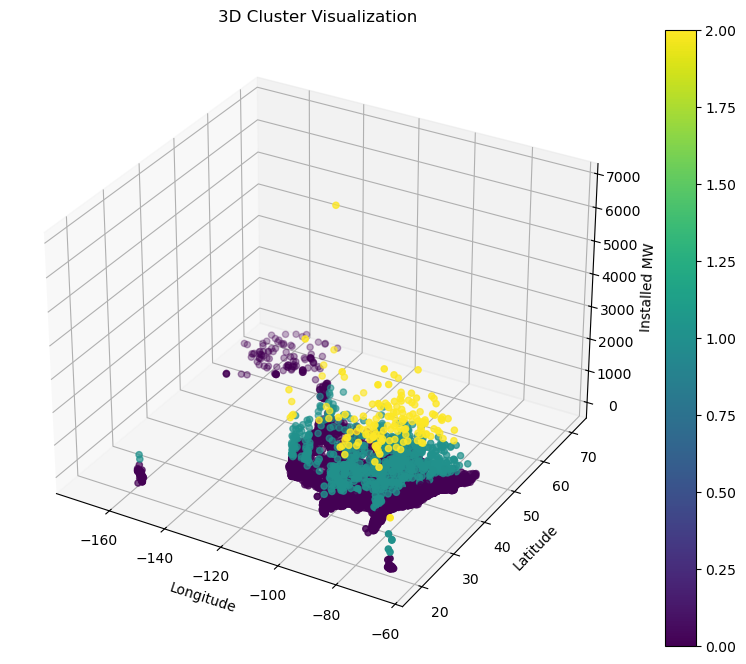

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Select only the training data for visualization
train_data = df.loc[X.index]

scatter = ax.scatter(X['Longitude'], X['Latitude'], X['Install_MW'], 
           c=train_data['cluster'], cmap='viridis', marker='o')

ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Installed MW')
plt.colorbar(scatter)
plt.show()

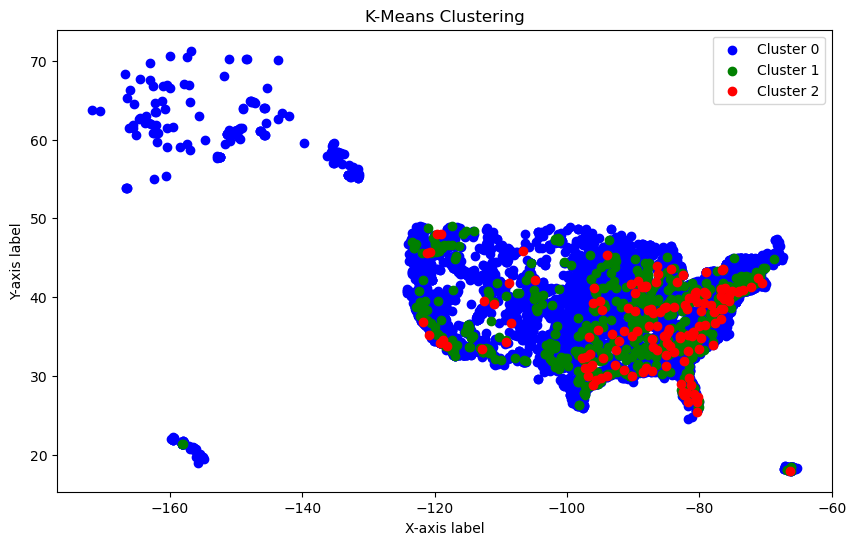

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']  # Add more colors if you have more than 8 clusters

for i in range(optimal_k):
    # Filter data for each cluster
    clustered_data = df[df['cluster'] == i]
    
    # Assuming 'x' and 'y' are the names of your columns
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], color=colors[i], label=f'Cluster {i}')

plt.title('K-Means Clustering')
plt.xlabel('X-axis label')  # Replace with your actual label
plt.ylabel('Y-axis label')  # Replace with your actual label
plt.legend()
plt.show()

In [11]:
df

,OBJECTID_1,OBJECTID,Plant_Code,Plant_Name,Utility_ID,Utility_Na,sector_nam,Street_Add,City,County,...,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW,Source,Period,Longitude,Latitude,cluster
0,1,13170,4068,Merrill,20860,Wisconsin Public Service Corp,Electric Utility,306 S Park St,Merrill,Lincoln,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-89.685000,45.178600,0.0
1,2,13171,4071,Potato Rapids,20860,Wisconsin Public Service Corp,Electric Utility,N4295 Potato Rapids Rd,Town of Porterfield,Marinette,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-87.758600,45.113600,0.0
2,3,13172,4072,Pulliam,20860,Wisconsin Public Service Corp,Electric Utility,1530 N Bylsby Av,Green Bay,Brown,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-88.008600,44.540000,0.0
3,4,13173,4074,Sandstone Rapids,20860,Wisconsin Public Service Corp,Electric Utility,N7633 Sandstone Lane,Town of Stephenson,Marinette,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-88.067800,45.233300,0.0
4,5,13174,4075,Tomahawk,20860,Wisconsin Public Service Corp,Electric Utility,W6080 Pride Pond Rd,Tomahawk,Lincoln,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-89.730600,45.441100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,12004,23573,66723,Sawtell Solar,65736,"Sawtell Solar, LLC",IPP Non-CHP,,,,...,0.0,0.0,3.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-82.375953,35.380139,0.0
12004,12005,23574,66724,Southwick Solar,65737,"Southwick Solar, LLC",IPP Non-CHP,,,,...,0.0,0.0,3.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-79.367698,36.009321,0.0
12005,12006,23575,66725,Whiskey Solar,65738,"Whiskey Solar, LLC",IPP Non-CHP,,,,...,0.0,0.0,5.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-79.736312,35.273434,0.0
12006,12007,23576,66729,(3K) 59 Hetcheltown Rd,64872,"Distributed Solar Development, LLC",IPP Non-CHP,,,,...,0.0,0.0,1.4,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-73.910480,42.876570,0.0


In [12]:
# clustered_data.groupby('cluster')['Total_MW'].sum()
df['cluster'].unique()

array([0., 1., 2.])

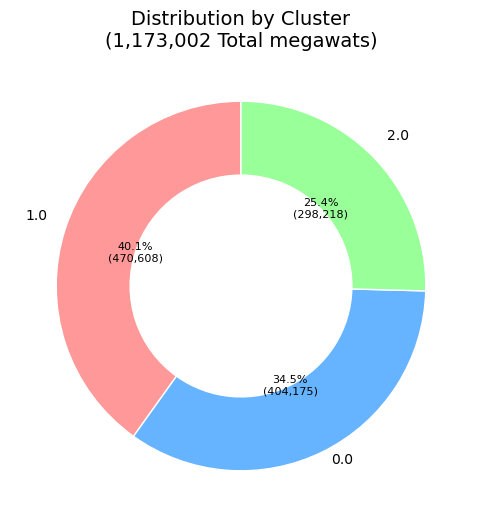

In [13]:


df_ByCluster = df.groupby('cluster')['Total_MW'].sum().sort_values(ascending=False)


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df_ByCluster,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df_ByCluster.index, df_ByCluster / df_ByCluster.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df_ByCluster),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution by Cluster\n({format(int(df_ByCluster.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()


In [14]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

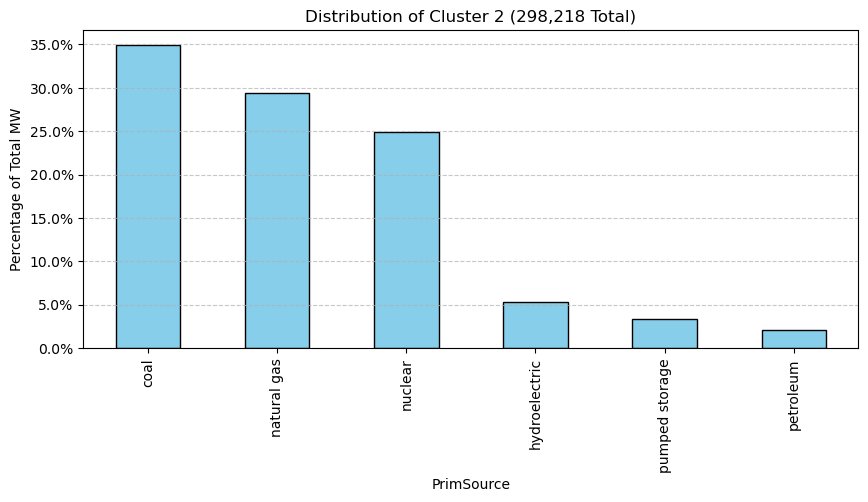

In [15]:
# Calculate percentage
df_StatisticsByCluster = df2.groupby('PrimSource')['Total_MW'].sum().sort_values(ascending=False)

df_StateStatistics_percent = df_StatisticsByCluster / df_StatisticsByCluster.sum() * 100
total_sum_per = df_StateStatistics_percent.sum()
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = df_StateStatistics_percent.plot(kind='bar', color='skyblue', edgecolor='black')

# Format y-axis labels to show percentage
ax.yaxis.set_major_formatter('{x:.1f}%')

# Add percentages to each bar
# for i, value in enumerate(df_StatisticsByCluster):
#     ax.text(i, value + 0.1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, rotation=90)

plt.title(f'Distribution of Cluster 2 ({df_StatisticsByCluster.sum():,.0f} Total)')
plt.xlabel('PrimSource')
plt.ylabel('Percentage of Total MW')

# Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(bottom=0.35)
plt.savefig("DistCLuster2.png")

plt.show()

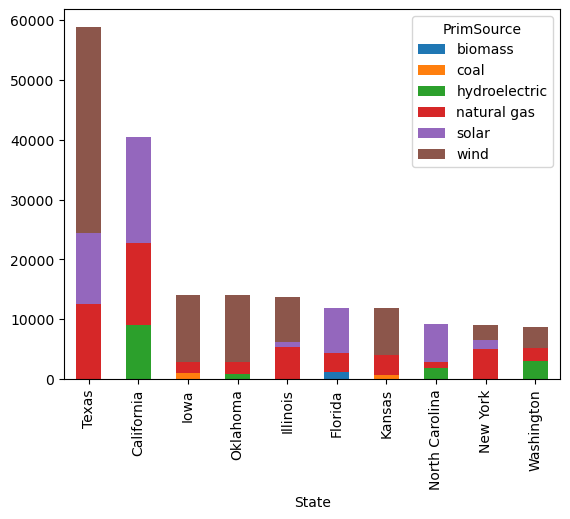

In [19]:
def get_top3 (year_top,df):
    def top (df,column = year_top):
        return df.sort_values(by=year_top,ascending=False)[:3]
    return df.groupby('State').apply(top).reset_index(drop=True)#[['OdName','AREA','AreaName','REG','RegName','DEV','DevName',year_top]]

def ByState(df):
    return df.groupby(['State','PrimSource'])['Total_MW'].sum().reset_index()


def Top10States(df):
    df_StateStatistics = df.groupby('State')['Total_MW'].sum().sort_values(ascending=False)
    return df_StateStatistics.reset_index().iloc[:10,:1]
# Top10States(ByState(df))

def VisTop10(df):
    df_VisTop10 = df[df['State'].isin(set(Top10States(df)['State']))]
    df_VisTop10 = df_VisTop10.groupby(['PrimSource','State'])['Total_MW'].sum().unstack().T
    df_VisTop10.fillna(0,inplace=True)
    df_VisTop10['Total'] = df_VisTop10.sum(axis=1)
    return df_VisTop10.sort_values(by='Total').iloc[:,:-1][::-1]
    
def PlotVisTop10(df):
    VisTop10(get_top3('Total_MW',ByState(df))).plot(kind='bar', stacked = True)
    return plt.show()

PlotVisTop10(df0)

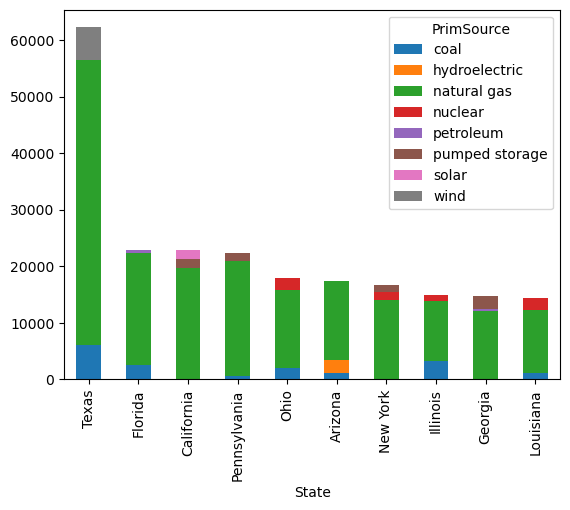

In [20]:
PlotVisTop10(df1)

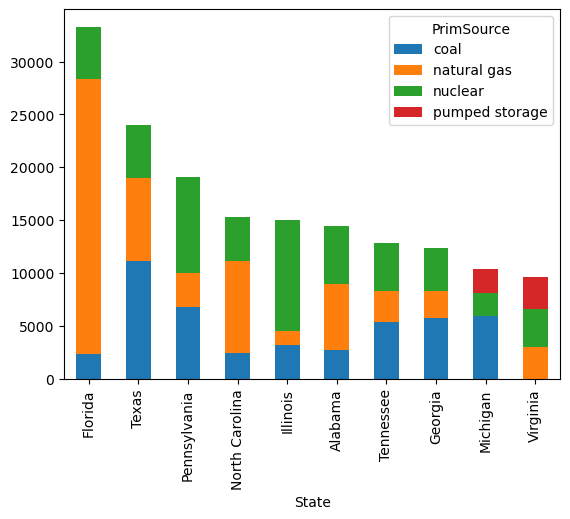

In [21]:
PlotVisTop10(df2)